# Data Cleanup [IN PROGRESS - NOT ADJUSTED TO CHANGES MADE IN DATA PREPARATION]

**input**: 
- "../data/silver/df_edges_raw.csv"
- "../data/silver/df_nodes_user_raw.csv"
- "../data/silver/df_nodes_merchant_raw.csv"

**output**: 
- "../data/gold/df_edges.csv"
- "../data/gold/df_nodes_user.csv"
- "../data/gold/df_nodes_merchant.csv"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
edges_raw = pd.read_csv("../data/silver/df_edges_raw.csv").sample(50) # delete "sample" part for final run
nodes_user_raw = pd.read_csv("../data/silver/df_nodes_user_raw.csv").sample(50) # delete "sample" part for final run
nodes_merchant_raw = pd.read_csv("../data/silver/df_nodes_merchant_raw.csv")# delete "sample" part for final run

## Merchant Nodes cleanup

In [7]:
display(nodes_merchant_raw)
nodes_merchant_raw.nunique()

,Unnamed: 0,Merchant Name,Merchant City,Merchant State,Zip,MCC
0,0,3527213246127876953,La Verne,CA,91750.0,5300
1,1,-727612092139916043,Monterey Park,CA,91754.0,5411
2,2,-727612092139916043,Monterey Park,CA,91754.0,5411
3,3,3414527459579106770,Monterey Park,CA,91754.0,5651
4,4,5817218446178736267,La Verne,CA,91750.0,5912
...,...,...,...,...,...,...
24386895,24386895,-5162038175624867091,Merrimack,NH,3054.0,5541
24386896,24386896,-5162038175624867091,Merrimack,NH,3054.0,5541
24386897,24386897,2500998799892805156,Merrimack,NH,3054.0,4121
24386898,24386898,2500998799892805156,Merrimack,NH,3054.0,4121


Unnamed: 0        24386900
Merchant Name       100343
Merchant City        13429
Merchant State         223
Zip                  27321
MCC                    109
dtype: int64

## Edges cleanup

In [4]:
display(edges_raw)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
2922357,243,1,2013,4,3,15:24,$47.91,Swipe Transaction,-3220758452254689706,Fort Walton Beach,FL,32548.0,5311,NaN,No
6461092,540,0,2007,5,21,12:24,$731.74,Swipe Transaction,1325201427189385167,Lawrence,MA,1841.0,3132,NaN,No
5744679,486,4,2008,6,9,09:54,$56.58,Swipe Transaction,-5475680618560174533,San Jose,CA,95117.0,5942,NaN,No
9936232,838,3,2008,7,22,19:18,$15.40,Online Transaction,-2088492411650162548,ONLINE,NaN,NaN,4784,NaN,No
12991646,1069,0,2006,6,14,22:55,$113.21,Swipe Transaction,6698459923198770712,Montgomery,AL,36117.0,4814,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001149,505,0,2015,7,29,07:40,$36.08,Online Transaction,6654290286221782850,ONLINE,NaN,NaN,4899,NaN,No
14800461,1217,0,2006,10,29,15:03,$10.57,Swipe Transaction,8878665205966093747,Atlanta,GA,30314.0,5411,NaN,No
11276764,937,4,2009,1,21,07:11,$30.10,Swipe Transaction,1139640404793641563,Reedley,CA,93654.0,5541,NaN,No
2276327,186,0,2018,10,24,04:17,$45.22,Chip Transaction,8080934608468946743,Plymouth,IN,46563.0,5310,NaN,No


In [5]:
df [df['Is Fraud?'] == 'Yes'].shape

(122, 15)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Errors?'),
  Text(1, 0, 'Zip'),
  Text(2, 0, 'Merchant State'),
  Text(3, 0, 'Month'),
  Text(4, 0, 'User'),
  Text(5, 0, 'Card'),
  Text(6, 0, 'Year'),
  Text(7, 0, 'Amount'),
  Text(8, 0, 'Time'),
  Text(9, 0, 'Day'),
  Text(10, 0, 'Use Chip'),
  Text(11, 0, 'Is Fraud?'),
  Text(12, 0, 'Merchant City'),
  Text(13, 0, 'Merchant Name'),
  Text(14, 0, 'MCC')])

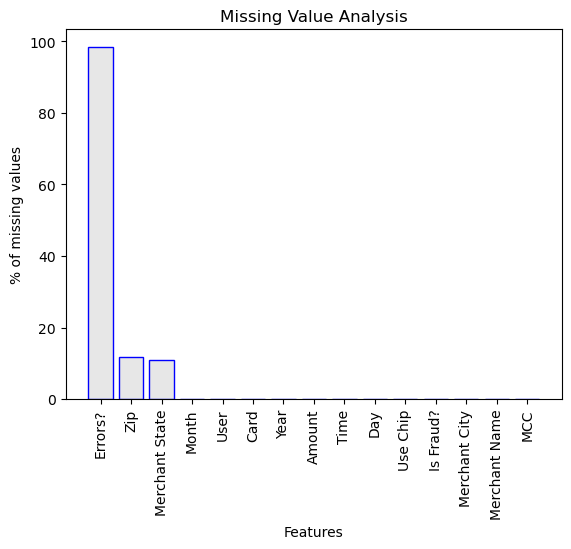

In [6]:
percent_missing=(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=True)
plt.title("Missing Value Analysis")
plt.xlabel("Features")
plt.ylabel("% of missing values")
plt.bar(percent_missing.sort_values(ascending=False).index,percent_missing.sort_values(ascending=False),color=(0.1, 0.1, 0.1, 0.1),edgecolor='blue')
plt.xticks(rotation=90)

In [7]:
df["card_id"] = df["User"].astype(str) + "_" + df["Card"].astype(str)
df["Amount"]=df["Amount"].str.replace("$","").astype(float)
df["Hour"] = df["Time"].str [0:2]
df["Minute"] = df["Time"].str [3:5]
df["IsFraud"] = df["Is Fraud?"].map({'Yes': 1, 'No':0})

In [8]:
df = df.drop(["Time","User","Card", "Is Fraud?"],axis=1)

In [9]:
df["Errors?"]= df["Errors?"].fillna("No error")

In [10]:
df["Merchant City"]=LabelEncoder().fit_transform(df["Merchant City"])
df["Use Chip"]=LabelEncoder().fit_transform(df["Use Chip"])
df["Errors?"]=LabelEncoder().fit_transform(df["Errors?"])

In [11]:
# df.to_csv('../data/credit_card_transactions_clean.csv')

In [12]:
display(df)

,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,card_id,Hour,Minute,IsFraud
2922357,2013,4,3,47.91,2,-3220758452254689706,1572,FL,32548.0,5311,8,243_1,15,24,0
6461092,2007,5,21,731.74,2,1325201427189385167,2452,MA,1841.0,3132,8,540_0,12,24,0
5744679,2008,6,9,56.58,2,-5475680618560174533,4059,CA,95117.0,5942,8,486_4,09,54,0
9936232,2008,7,22,15.40,1,-2088492411650162548,3291,NaN,NaN,4784,8,838_3,19,18,0
12991646,2006,6,14,113.21,2,6698459923198770712,2958,AL,36117.0,4814,8,1069_0,22,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001149,2015,7,29,36.08,1,6654290286221782850,3291,NaN,NaN,4899,8,505_0,07,40,0
14800461,2006,10,29,10.57,2,8878665205966093747,184,GA,30314.0,5411,8,1217_0,15,03,0
11276764,2009,1,21,30.10,2,1139640404793641563,3808,CA,93654.0,5541,8,937_4,07,11,0
2276327,2018,10,24,45.22,0,8080934608468946743,3642,IN,46563.0,5310,8,186_0,04,17,0


In [13]:
df.to_csv('../data/credit_card_transactions_clean_small.csv', index=False)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2922357 to 21996003
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            100000 non-null  int64  
 1   Month           100000 non-null  int64  
 2   Day             100000 non-null  int64  
 3   Amount          100000 non-null  float64
 4   Use Chip        100000 non-null  int64  
 5   Merchant Name   100000 non-null  int64  
 6   Merchant City   100000 non-null  int64  
 7   Merchant State  88942 non-null   object 
 8   Zip             88340 non-null   float64
 9   MCC             100000 non-null  int64  
 10  Errors?         100000 non-null  int64  
 11  card_id         100000 non-null  object 
 12  Hour            100000 non-null  object 
 13  Minute          100000 non-null  object 
 14  IsFraud         100000 non-null  int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 12.2+ MB


In [15]:
df1 = pd.read_csv('../data/credit_card_transactions_clean_small.csv')
display(df1)

,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,card_id,Hour,Minute,IsFraud
0,2013,4,3,47.91,2,-3220758452254689706,1572,FL,32548.0,5311,8,243_1,15,24,0
1,2007,5,21,731.74,2,1325201427189385167,2452,MA,1841.0,3132,8,540_0,12,24,0
2,2008,6,9,56.58,2,-5475680618560174533,4059,CA,95117.0,5942,8,486_4,9,54,0
3,2008,7,22,15.40,1,-2088492411650162548,3291,NaN,NaN,4784,8,838_3,19,18,0
4,2006,6,14,113.21,2,6698459923198770712,2958,AL,36117.0,4814,8,1069_0,22,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,7,29,36.08,1,6654290286221782850,3291,NaN,NaN,4899,8,505_0,7,40,0
99996,2006,10,29,10.57,2,8878665205966093747,184,GA,30314.0,5411,8,1217_0,15,3,0
99997,2009,1,21,30.10,2,1139640404793641563,3808,CA,93654.0,5541,8,937_4,7,11,0
99998,2018,10,24,45.22,0,8080934608468946743,3642,IN,46563.0,5310,8,186_0,4,17,0
